# Data Directory

In [10]:
!apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (69.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/DistillationChain_EAR/datos.zip" "/content"
!unzip datos.zip
!rm datos.zip

Archive:  datos.zip
   creating: Datos/
   creating: Datos/chronic_otitis_media/
  inflating: Datos/chronic_otitis_media/o1.jpg  
  inflating: Datos/chronic_otitis_media/o10.jpg  
  inflating: Datos/chronic_otitis_media/o100.jpg  
  inflating: Datos/chronic_otitis_media/o101.jpg  
  inflating: Datos/chronic_otitis_media/o102.jpg  
  inflating: Datos/chronic_otitis_media/o103.jpg  
  inflating: Datos/chronic_otitis_media/o104.jpg  
  inflating: Datos/chronic_otitis_media/o105.jpg  
  inflating: Datos/chronic_otitis_media/o106.jpg  
  inflating: Datos/chronic_otitis_media/o107.jpg  
  inflating: Datos/chronic_otitis_media/o108.jpg  
  inflating: Datos/chronic_otitis_media/o109.jpg  
  inflating: Datos/chronic_otitis_media/o10_  
  inflating: Datos/chronic_otitis_media/o11.jpg  
  inflating: Datos/chronic_otitis_media/o110.jpg  
  inflating: Datos/chronic_otitis_media/o111.jpg  
  inflating: Datos/chronic_otitis_media/o112.jpg  
  inflating: Datos/chronic_otitis_media/o113.jpg  
  inflati

In [4]:
# !tree /content/Datos -d

# supervised v1.0

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [37]:
dataset_dir = '/content/Datos'

img_size = 299
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 576 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


In [38]:
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

model.save('/content/InceptionV3_chronic_otitis_media_model.h5')

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 208s 11s/step - accuracy: 0.4464 - loss: 2.3509 - val_accuracy: 0.6562 - val_loss: 0.6709
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8123
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 188s 10s/step - accuracy: 0.8681 - loss: 0.3255 - val_accuracy: 0.7734 - val_loss: 0.4527
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 397ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4836
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.9423 - loss: 0.1852 - val_accuracy: 0.7266 - val_loss: 0.4912
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3760
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 206s 11s/step - accuracy: 0.9809 - loss: 0.0950 - val_accuracy: 0.8047 - val_loss: 0.4186
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3361
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 189s 11s/step - accuracy: 0.9909 - loss: 0.06

5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.7760 - loss: 0.4228
Validation Loss: 0.3567381501197815
Validation Accuracy: 0.8125


In [41]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.8016 - loss: 0.3859
Validation Loss: 0.3567381501197815
Validation Accuracy: 0.8125


# supervised v2.0

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset directory
dataset_dir = '/content/Datos'

# Define image size
img_size = 299

# Define batch size
batch_size = 32

# Create ImageDataGenerator for data preprocessing and splitting
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)  # 30% for validation and testing

# Load training data (70% of the dataset)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load testing data (20% of the dataset) - Use another ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)  # Test data only needs rescaling
test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
)


Found 504 images belonging to 4 classes.
Found 216 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [6]:
# Load InceptionV3 model with pre-trained weights
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',  # Use ImageNet pre-trained weights
    include_top=False,   # Exclude the final classification layers
    input_shape=(img_size, img_size, 3)
)

# Freeze the base model layers to prevent training on them
base_model.trainable = False

# Build the final model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Number of epochs to train
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('/content/InceptionV3_chronic_otitis_media_model.h5')


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3862 - loss: 2.1334 - val_accuracy: 0.6823 - val_loss: 0.9045
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5938 - loss: 1.0043

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.5938 - loss: 1.0043 - val_accuracy: 0.7083 - val_loss: 0.7983
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 172ms/step - accuracy: 0.8815 - loss: 0.3401 - val_accuracy: 0.7552 - val_loss: 0.6524
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9688 - loss: 0.1261 - val_accuracy: 0.8750 - val_loss: 0.3725
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.9406 - loss: 0.1780 - val_accuracy: 0.7552 - val_loss: 0.5658
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.0854 - val_accuracy: 0.7500 - val_loss: 0.5444
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.9704 - loss: 0.0944 - val_accuracy: 0.7500 - val_loss: 0.5113
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0360 - val_accuracy: 0.9167 - val_loss: 0.2539
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9867 - loss: 0.0646 - val_accuracy: 0.7656 - val_los

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 533ms/step - accuracy: 0.9267 - loss: 0.2023
Test Loss: 0.15964572131633759
Test Accuracy: 0.9458333253860474


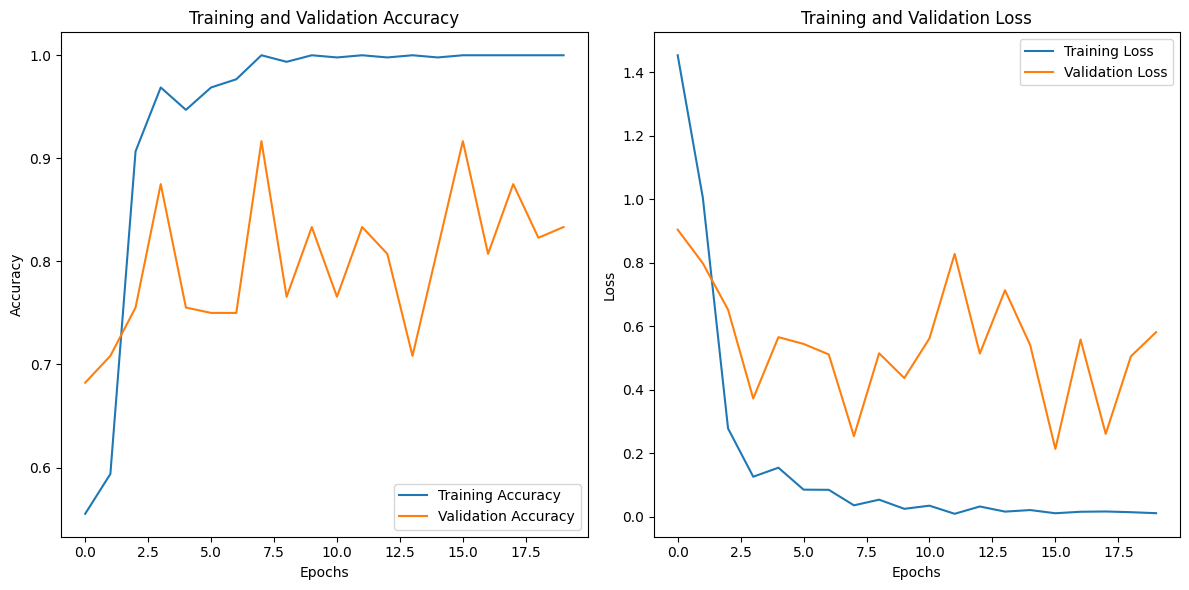

In [8]:
# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# Training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Distialltion v1.0

In [9]:
import tensorflow as tf

def distillation_loss(y_true, y_pred, teacher_pred, temperature=3.0, alpha=0.7):
    # Cross-entropy loss for true labels
    ce_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

    # Softmax on the teacher's and student's predictions
    teacher_pred = tf.nn.softmax(teacher_pred / temperature)
    student_pred = tf.nn.softmax(y_pred / temperature)

    # KL divergence between the student and teacher
    kl_loss = tf.reduce_mean(tf.reduce_sum(teacher_pred * tf.math.log(teacher_pred / student_pred), axis=-1))

    # Combine the two losses
    return alpha * ce_loss + (1 - alpha) * kl_loss


In [10]:
# Initialize Model 1 (InceptionV3)
base_model1 = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model1.trainable = False

model1 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1 on the first 10% of the data
history1 = model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save Model 1
model1.save('/content/model1.h5')

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5367 - loss: 2.2555 - val_accuracy: 0.6354 - val_loss: 0.7658
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.8750 - loss: 0.3597 - val_accuracy: 0.6250 - val_loss: 0.7915
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.8547 - loss: 0.3360 - val_accuracy: 0.6823 - val_loss: 0.7785
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.1666 - val_accuracy: 0.7500 - val_loss: 0.5674
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9428 - loss: 0.1958 - val_accuracy: 0.7188 - val_loss: 0.6644
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9688 - loss: 0.1030 - val_accuracy: 0.7500 - val_loss: 0.5721
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.9663 - loss: 0.0968 - val_accuracy: 0.7708 - val_loss: 0.5676
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.2553 - val_accuracy: 0.7917 - v

In [18]:
# # Initialize Model 2 (InceptionV3)
# base_model2 = tf.keras.applications.InceptionV3(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(img_size, img_size, 3)
# )

# base_model2.trainable = False

# model2 = tf.keras.Sequential([
#     base_model2,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
# ])

# model2.compile(optimizer='adam', loss=lambda y_true, y_pred: distillation_loss(y_true, y_pred, model1.predict(train_generator)), metrics=['accuracy'])

# # Train Model 2 on the next 10% of the data
# history2 = model2.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=20,
#     steps_per_epoch=train_generator.samples // batch_size,
#     validation_steps=validation_generator.samples // batch_size
# )

# # Save Model 2
# model2.save('/content/model2.h5')

In [24]:
import tensorflow as tf

# Function to create a Keras layer for teacher predictions
def TeacherPredictionsLayer(teacher_model):
    def teacher_predictions_fn(inputs):
        return teacher_model(inputs, training=False)

    return tf.keras.layers.Lambda(teacher_predictions_fn)

# Build student model (Model 2)
base_model2 = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model2.trainable = False

# Get the input tensor for the student model
input_tensor = tf.keras.Input(shape=(img_size, img_size, 3))

# Pass the input through the student model's layers
x = base_model2(input_tensor)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
student_predictions = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

# Get teacher predictions using the input tensor
teacher_predictions_layer = TeacherPredictionsLayer(model1)
teacher_predictions = teacher_predictions_layer(input_tensor)

# Concatenate student and teacher predictions for the loss function
output_tensor = tf.keras.layers.concatenate([student_predictions, teacher_predictions])


# Create the Functional model
model2 = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)


# Modify the inputs to the distillation loss
def custom_distillation_loss(y_true, y_pred):
    """Custom distillation loss using the teacher predictions layer output."""
    teacher_pred = y_pred[:, -len(train_generator.class_indices):] # Teacher predictions are the last columns of y_pred
    student_pred = y_pred[:, :-len(train_generator.class_indices)] # Student predictions are the first columns of y_pred


    return distillation_loss(y_true, student_pred, teacher_pred)

# Compile the model using the modified custom_distillation_loss
model2.compile(optimizer='adam', loss=custom_distillation_loss, metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save Model 2
model2.save('/content/model2.h5')

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0397 - loss: 1.7842 - val_accuracy: 0.0208 - val_loss: 0.6630
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.0000e+00 - loss: 0.5719

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 639ms/step - accuracy: 0.0000e+00 - loss: 0.5719 - val_accuracy: 0.0833 - val_loss: 0.3157
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.0194 - loss: 0.3237 - val_accuracy: 0.1250 - val_loss: 0.5046
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0312 - loss: 0.2202 - val_accuracy: 0.1667 - val_loss: 0.3941
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.0139 - loss: 0.1659 - val_accuracy: 0.0990 - val_loss: 0.4325
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0312 - loss: 0.0401 - val_accuracy: 0.0833 - val_loss: 0.4088
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.0610 - loss: 0.0880 - val_accuracy: 0.0781 - val_loss: 0.3635
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0929 - val_accuracy: 0.1250 - val_loss: 0.3374
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.0694 - loss: 0.0541 - val_accuracy: 0.2031

In [26]:
# Initialize Model 3 (InceptionV3)
base_model3 = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model3.trainable = False

# Get the input tensor for the student model
input_tensor = tf.keras.Input(shape=(img_size, img_size, 3))

# Pass the input through the student model's layers
x = base_model3(input_tensor)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
student_predictions = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

# Get teacher predictions using the input tensor and Model 2 as the teacher
# Note: We are removing the last layer of model2 to get the teacher predictions
teacher_model = tf.keras.Model(inputs=model2.input, outputs=model2.layers[-2].output) # -2 to get output before concat
teacher_predictions_layer = TeacherPredictionsLayer(teacher_model)
teacher_predictions = teacher_predictions_layer(input_tensor)

# Concatenate student and teacher predictions for the loss function
output_tensor = tf.keras.layers.concatenate([student_predictions, teacher_predictions])

# Create the Functional model
model3 = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

# Modify the inputs to the distillation loss
def custom_distillation_loss(y_true, y_pred):
    """Custom distillation loss using the teacher predictions layer output."""
    teacher_pred = y_pred[:, -len(train_generator.class_indices):]  # Teacher predictions are the last columns
    student_pred = y_pred[:, :-len(train_generator.class_indices)]  # Student predictions are the first columns

    return distillation_loss(y_true, student_pred, teacher_pred)

# Compile the model using the modified custom_distillation_loss
model3.compile(optimizer='adam', loss=custom_distillation_loss, metrics=['accuracy'])

# Train Model 3
history3 = model3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save Model 3
model3.save('/content/model3.h5')

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0037 - loss: 1.7943 - val_accuracy: 0.0365 - val_loss: 0.5588
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 614ms/step - accuracy: 0.0312 - loss: 0.2166 - val_accuracy: 0.0417 - val_loss: 0.4436
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.0030 - loss: 0.2311 - val_accuracy: 0.0677 - val_loss: 0.3933
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.1113 - val_accuracy: 0.0417 - val_loss: 0.4739
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.0487 - loss: 0.1286 - val_accuracy: 0.1510 - val_loss: 0.3429
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0938 - loss: 0.1239 - val_accuracy: 0.1250 - val_loss: 0.4156
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.0619 - loss: 0.0736 - val_accuracy: 0.1250 - val_loss: 0.3921
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0938 - loss: 0.1353 - val_accuracy: 0

In [27]:
# Evaluate Model 3 on the test data
test_loss, test_accuracy = model3.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 599ms/step - accuracy: 0.2970 - loss: 0.1165
Test Loss: 0.11936160176992416
Test Accuracy: 0.28611111640930176


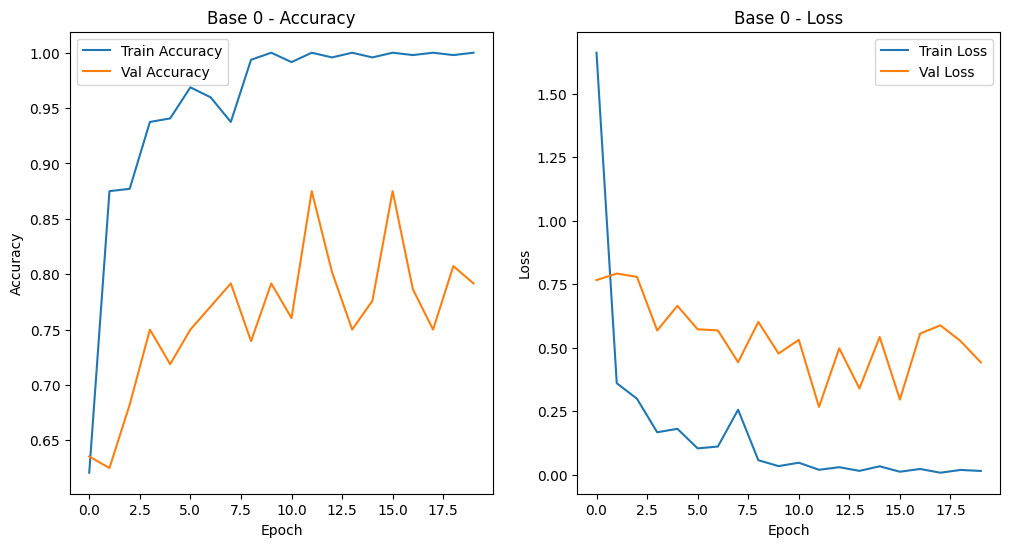

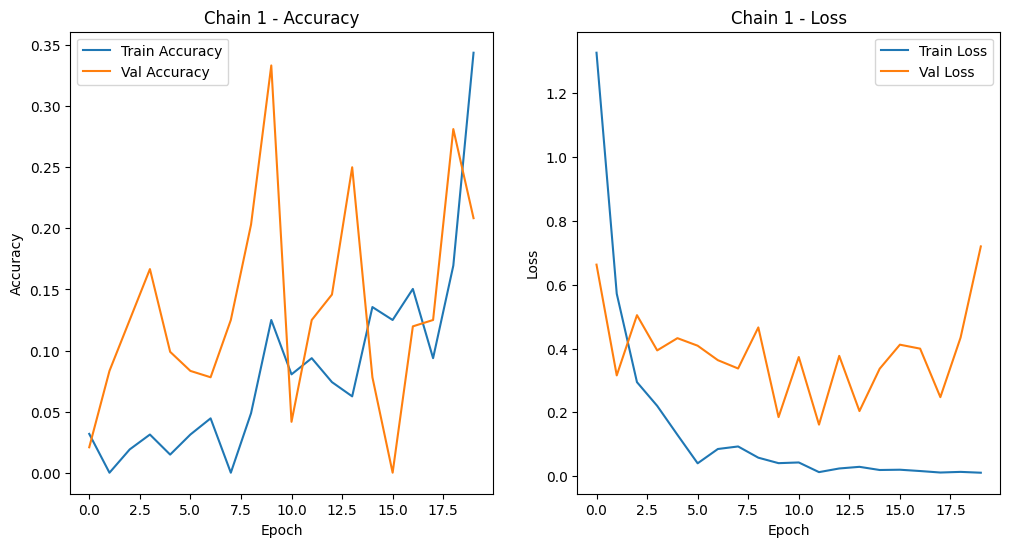

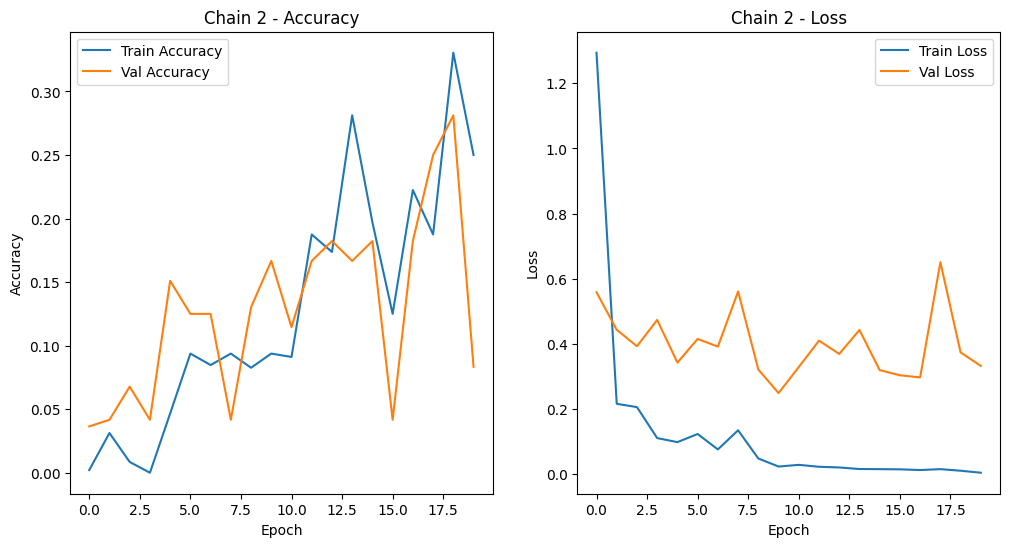

In [29]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for Model 1
plot_history(history1, 'Base 0')

# Plot for Model 2
plot_history(history2, 'Chain 1')

# Plot for Model 3
plot_history(history3, 'Chain 2')
